## Programming for Data Analysis Final Project
### Lecturer: Brian McGinley
#### Submission Date: 16/12/2019



Intro..Phenomenon.. assumptions.. algorithm.. packages used.. dataset.. analyses and descriptions.. conclusion..

"Poker is unquestionably thriving among men, but women remain underrepresented in poker rooms all around the world and at the Main Event.Last year, just 272 of the 7,221 entries were female (3.7 percent), a troubling stat for those who advocate women in poker. There wasn’t much improvement this year, with only 3.8 percent (301 of 7,874) of the field being women." (Sofen, 2018)

Tanguy (2019)
when you use numpy.random in multiprocess application - it can lead to misleading behaviors.

Willems(2019) Pandas - "it offers powerful, expressive and flexible data structures that make data manipulation and analysis easy [...]The DataFrame is one of these structures".

Dataframe offers two dimensional labelled data structures with columns which can accept different data types.


Cohen (2019)
Which data to sample.
Which sampling distribution to follow and when?
Which sampling algorithm to use.
How many to sample?

#### Criteria and Workflow.
Count
Simple definition and short task description.
Routine measurements and agreement between measurements.
Sample appropriately & create the dataset.
Carefully choose solution
Use a simple visualizations to explain task.

Geeks for Geeks (2019) "Generating random numbers has always been an useful utility in day-day programming for games or various types of gambling etc. Hence knowledge and shorthands of it in any programming language is always a plus to have"


Intro..
 
The objective of this assignment is to simulate a dataset of a real world phenomenon that is of interest and then analyze the dataset using various python codes and python packages. 
The packages used in this dataset include numpy, scipy, matplotlib, seaborn and pandas. 
The simulation of the dataset will be completed using numpys random package and then pandas dataframe function to create the dataset on one output. The simulated dataset will be based on the phenomenon of the final of a league based poker tournament format where the participants gain entry by entering at least one of the leagues gameweeks.

The description of this phenomenon, assumptions related to it, and generation of this dataset in its entirety will be discussed first. The simulated dataset will then be output in this notebook.

Finally the dataset will be analyzed, manipulated, visualized, assessed and have conclusions drawn from it in its entirety and the relationships, if any, between the variables within it to justify the phenomenon.


Phenomenon

The phenomenon chosen is the generation of the final of a poker tournament based on several variables. The poker tournament used is based on a league format. The league consists of 150 participants/players. There are 30 gameweeks. The 150 participants are split into 90 percent men and 10 percent women and into randomly assigned poker playing levels of beginner, intermediate and advanced.


The participants ages will be generated in the range 18-75 considering the likelihood of ages of participants in a tournament.

The players gain points each week for playing, graded on the participants placement in each gameweek, i.e. 1 point for each of the 150 participants meaning last place gets 1 point, 75th gets 75 points and 1st get 150, etc.

These points are accumulated throughout the gameweeks and are related to the gameweeks played meaning those in the range of gameweeks played 0-10 will have less points than 10-20 and so on.


The final tournament chip count for playing is then calculated from these points accumulated to give final chip counts which the players will play with at the final off the tournament.

Each point gets 500 chips so these are generated from the points column by multiplying them plus a 1000 bonus chips for each participant in the final.

The final data point which will be simulated and added into the dataset to assume its relevance to a players chances in the final is previous hand win percentage. These will randomized in the range 30% - 65% because............

This dataset will use pre-tournament data points to try and figure out some of the following. 
Is there a relationship between gamweeks played and final chip counts?

Is there a relationship between level and chip count?

Is there a relationship between age and chip count in final?

Is there a relationship between sex and chip count in final?

Is there a relationship between the hands won percentage and chip count in final?

We will compile univariate analysis, bivariate analysis and multivariate analysis to see if there are more explanations inferred in the dataset..

Number of Inputs: 150
Number of Attributes/columns: chipcount, gameweeksplayed, level, win percentage, sex, entries
Attribute Measurement: 
* chipcount = numeric (500 per point + 1000 bonus)
* points = numeric
* gameweeksplayed = numeric - 30 total
* winpercentage = numeric percentage - ranges out of 100 - highest 65%
* level = beginner, intermediate, advanced
* sex = Male/Female
* age = numeric 18 - 75
* size = count of players in the final - 150
* analysis Type: Multivariate

np.random.seed(1)
np.sort(chiplow)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [77]:
#age
np.random.seed(1)
age = np.random.randint(18, 75, 150)
age

array([55, 61, 30, 26, 27, 29, 23, 33, 18, 34, 19, 30, 25, 63, 24, 43, 68,
       38, 55, 36, 38, 29, 60, 46, 47, 32, 68, 22, 41, 41, 59, 67, 73, 48,
       50, 40, 31, 59, 27, 25, 40, 19, 18, 35, 26, 42, 31, 69, 65, 60, 26,
       48, 25, 21, 24, 39, 67, 21, 22, 42, 67, 61, 30, 44, 70, 34, 63, 69,
       59, 36, 33, 18, 22, 43, 65, 52, 41, 25, 44, 43, 58, 40, 27, 21, 57,
       41, 54, 45, 55, 37, 56, 26, 50, 52, 28, 41, 33, 65, 41, 43, 25, 69,
       46, 28, 64, 50, 42, 41, 73, 19, 67, 31, 21, 18, 74, 31, 24, 70, 39,
       24, 20, 30, 45, 39, 29, 25, 31, 26, 29, 30, 61, 38, 48, 54, 57, 25,
       63, 22, 66, 36, 50, 31, 28, 41, 35, 25, 42, 28, 46, 38])

In [79]:
#gameweeks attended
np.random.seed(1)
gwp10 = np.random.randint(1, 10, 50)
np.random.seed(1)
gwp20 = np.random.randint(11, 20, 50)
np.random.seed(1)
gwp30 = np.random.randint(21, 30, 50)
np.random.seed(1)
partweek = np.append(gwp10, gwp20)
totalgwp = np.append(partweek, gwp30)
totalgwp

array([ 6,  9,  6,  1,  1,  2,  8,  7,  3,  5,  6,  3,  5,  3,  5,  8,  8,
        2,  8,  1,  7,  8,  7,  2,  1,  2,  9,  9,  4,  9,  8,  4,  7,  6,
        2,  4,  5,  9,  2,  5,  1,  4,  3,  1,  5,  3,  8,  8,  9,  7, 16,
       19, 16, 11, 11, 12, 18, 17, 13, 15, 16, 13, 15, 13, 15, 18, 18, 12,
       18, 11, 17, 18, 17, 12, 11, 12, 19, 19, 14, 19, 18, 14, 17, 16, 12,
       14, 15, 19, 12, 15, 11, 14, 13, 11, 15, 13, 18, 18, 19, 17, 26, 29,
       26, 21, 21, 22, 28, 27, 23, 25, 26, 23, 25, 23, 25, 28, 28, 22, 28,
       21, 27, 28, 27, 22, 21, 22, 29, 29, 24, 29, 28, 24, 27, 26, 22, 24,
       25, 29, 22, 25, 21, 24, 23, 21, 25, 23, 28, 28, 29, 27])

NameError: name 'charar' is not defined

In [80]:
#points generation
np.random.seed(1)
ptlow = np.random.randint(1, 150, 50)
np.random.seed(1)
ptmed = np.random.randint(151, 300, 50)
np.random.seed(1)
pthigh = np.random.randint(301, 600, 50)
np.random.seed(1)
ptpart = np.append(ptlow, ptmed)
totalpts = np.append(ptpart, pthigh)
totalpts

array([ 38, 141,  73, 138, 134,  80, 145, 130,  72, 135,  26,  21, 102,
       147, 140, 143,  51,  69,  97,  87, 142, 138,   8,  64,  62,  23,
        58,   2, 129,  61,   9, 142, 116, 122,  31,  72, 132,  50,  58,
         4,  25,  44,  77,  27,  53,  81, 110, 116,  42,  16, 188, 291,
       223, 288, 284, 230, 295, 280, 222, 285, 176, 171, 252, 297, 290,
       293, 201, 219, 247, 237, 292, 288, 158, 214, 212, 173, 208, 152,
       279, 211, 159, 292, 266, 272, 181, 222, 282, 200, 208, 154, 175,
       194, 227, 177, 203, 231, 260, 266, 192, 166, 338, 536, 373, 556,
       504, 434, 445, 430, 372, 538, 582, 479, 577, 555, 553, 457, 351,
       369, 516, 542, 387, 442, 308, 323, 302, 510, 565, 517, 442, 416,
       422, 331, 372, 350, 304, 581, 344, 377, 327, 410, 598, 316, 365,
       497, 326, 527, 583, 454, 405, 323])

In [81]:
#chips
np.random.seed(1)
chips = 500 * totalpts + 1000
chips

array([ 20000,  71500,  37500,  70000,  68000,  41000,  73500,  66000,
        37000,  68500,  14000,  11500,  52000,  74500,  71000,  72500,
        26500,  35500,  49500,  44500,  72000,  70000,   5000,  33000,
        32000,  12500,  30000,   2000,  65500,  31500,   5500,  72000,
        59000,  62000,  16500,  37000,  67000,  26000,  30000,   3000,
        13500,  23000,  39500,  14500,  27500,  41500,  56000,  59000,
        22000,   9000,  95000, 146500, 112500, 145000, 143000, 116000,
       148500, 141000, 112000, 143500,  89000,  86500, 127000, 149500,
       146000, 147500, 101500, 110500, 124500, 119500, 147000, 145000,
        80000, 108000, 107000,  87500, 105000,  77000, 140500, 106500,
        80500, 147000, 134000, 137000,  91500, 112000, 142000, 101000,
       105000,  78000,  88500,  98000, 114500,  89500, 102500, 116500,
       131000, 134000,  97000,  84000, 170000, 269000, 187500, 279000,
       253000, 218000, 223500, 216000, 187000, 270000, 292000, 240500,
      

In [82]:
##handswon
np.random.seed(1)
handswon = np.random.randint(low= 25, high=66, size=150)
handswon

array([62, 37, 33, 34, 36, 30, 40, 25, 41, 26, 37, 32, 31, 50, 45, 62, 43,
       45, 36, 53, 54, 39, 29, 48, 48, 55, 57, 47, 38, 34, 32, 47, 26, 25,
       42, 33, 49, 38, 33, 55, 32, 28, 31, 46, 28, 29, 49, 37, 51, 41, 43,
       40, 25, 29, 50, 59, 48, 32, 51, 50, 65, 47, 34, 28, 64, 48, 61, 52,
       62, 44, 63, 33, 57, 59, 35, 48, 40, 48, 50, 32, 53, 35, 57, 49, 48,
       26, 38, 28, 25, 38, 31, 46, 31, 27, 37, 52, 46, 36, 32, 38, 33, 36,
       37, 45, 55, 61, 64, 32, 29, 43, 57, 38, 35, 48, 42, 32, 49, 35, 53,
       45, 57, 37, 26, 55, 49, 43, 58, 27, 53, 64, 59, 35, 57, 43, 47, 31,
       27, 32, 64, 40, 30, 42, 45, 47, 62, 38, 58, 45, 35, 57])

In [84]:
#level
np.random.seed(1)
three_groups = ('beginner', 'intermediate', 'advanced')
level = np.random.choice(three_groups, 150)

In [130]:
# sex
np.random.seed(1)
male = ('male', 'male')
female = ('female', 'female')
# 10% women calculation
sex = (np.append(np.random.choice(male, 135), np.random.choice(female, 15)))
np.random.seed(1)
gender = np.random.permutation(sex)

#gender
#dataframe=pd.DataFrame(level, columns=['gender']) 
#dataframe.head()

In [133]:
df = pd.DataFrame({'chips': chips, 'gwp': totalgwp, 'totalpts': totalpts, 'gender': gender, 'age':age, 'level': level, 'handswon%': handswon})
df.index = dataframe.index + 1
df.index.name = 'count'
print(df)

        chips  gwp  totalpts  gender  age         level  handswon%
count                                                             
1       20000    6        38    male   55  intermediate         62
2       71500    9       141    male   61      beginner         37
3       37500    6        73    male   30      beginner         33
4       70000    1       138    male   26  intermediate         34
5       68000    1       134    male   27  intermediate         36
6       41000    2        80    male   29      beginner         30
7       73500    8       145  female   23      beginner         40
8       66000    7       130    male   33  intermediate         25
9       37000    3        72    male   18      beginner         41
10      68500    5       135    male   34  intermediate         26
11      14000    6        26    male   19      beginner         37
12      11500    3        21    male   30      advanced         32
13      52000    5       102    male   25  intermediate       

* chipcount = numeric (500 per point + 1000 bonus)
* points = numeric
* gameweeksplayed = numeric - 30 total
* winpercentage = numeric percentage - ranges out of 100 - highest 65%
* level = beginner, intermediate, advanced
* sex = Male/Female
* age = numeric 18 - 75
* size = count of players in the final - 150

AssertionError: 3 columns passed, passed data had 150 columns

In [16]:
#########numpy.savetxt("mydataset.csv", totalchip,fmt='%.2f')

In [17]:
df = pd.DataFrame()   
print(df)

Empty DataFrame
Columns: []
Index: []


In [18]:
#binomial example 55% tournament win rate)
import matplotlib.pyplot as plt
cash = np.zeros(10000)
cash[0] = 0
outcome = np.random.binomial(1, 1, size=len(cash))

for i in range(1, len(cash)):
    if outcome[i] < 1:
        cash[i] = cash[i - 1] - 1
    elif outcome[i] < 3:
        cash[i] = cash[i - 1] + 1
                
print(outcome.min(), outcome.max())

1 1


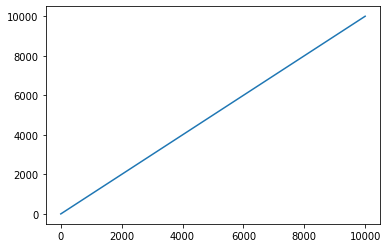

In [19]:
straight = np.arange(len(cash))
plt.plot(straight, cash)
plt.show()

In [21]:
n, p = 150, .55  # number of hands, probability of each hand
s = np.random.binomial(n, p)

sum(np.random.binomial(9, 0.65, 1000000) == 0)/1000000.

7.7e-05